<a href="https://colab.research.google.com/github/23Aditya/Resnet50-image-classification/blob/main/Resnet50_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1/1 [==============================] - 1s 1s/step


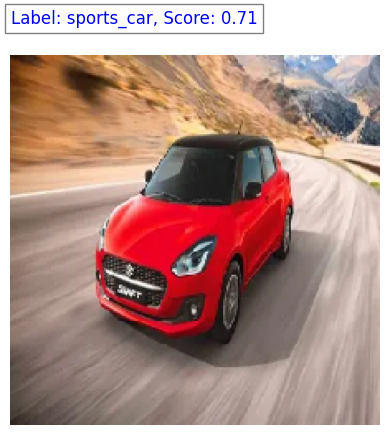

In [19]:
import numpy as np
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load ResNet50 model pre-trained on ImageNet data
model = ResNet50(weights='imagenet')

# Define a function to predict the class of an image
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))  # Load image and resize to 224x224
    x = image.img_to_array(img)  # Convert image to numpy array
    x = np.expand_dims(x, axis=0)  # Add batch dimension
    x = preprocess_input(x)  # Preprocess input (scaling and normalization)
    preds = model.predict(x)  # Make prediction
    decoded_preds = decode_predictions(preds, top=2)[0]  # Decode the prediction into human-readable labels
    return img, decoded_preds

# Provide path to your image
image_path = '/content/car.jpeg'

# Make prediction
img, predictions = predict_image(image_path)

# Plot image with bounding boxes
plt.imshow(img)
ax = plt.gca()

for _, label, score in predictions:
    if score > 0.5:  # Only draw bounding box if the prediction confidence is higher than 50%
        ax.text(0, -20, 'Label: {}, Score: {:.2f}'.format(label, score), color='blue', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
        # plt.title('Predictions')
        plt.axis('off')

plt.show()
